In [1]:
import json
import numpy as np
import matplotlib as plt
%matplotlib inline
import pandas as pd
import feedparser as fp
import requests
import datetime
from operator import itemgetter
from Replace import replace, unwanted_titles

# Gets the Entries Values from the Entries RSS Feed Key
entries = fp.parse('https://thepiratebay.org/rss/top100/201')['entries']

# Month Dictionary for replacing %b month format with numeric format
month_dict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
              "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10,"Nov": 11, "Dec": 12}

# API key for omdbapi.com. This is a distinct key per user. Non-paterion users limits to 1000 post requests per day.
api_key = "1b1c7b21"

# Recording types that are not about Standard Definition
udrts = ["HDCAM", "HD CAM","TS","HD-TS","HDTS","HD-TC","HDTC"]

In [2]:
def trim_magnet(magnet_link):
    """Trims the extra information from the magnet link"""
    show_name = magnet_link.replace(".", " ").strip()
    show_name = show_name.replace("+", " ").strip()
    for value in replace:
        show_name = show_name.replace(value, "")
        
    for y in range(1900, 2020):
        if str(y) in show_name:
            show_name = show_name.replace(str(y), "")
            
    return show_name

In [3]:
def format_dateYYYYMMDD(date):
    """formats date as yyyy-mm-dd"""
    date_list = date.split()
    year = int(date_list[2])
    month = month_dict.get(date_list[1])
    day = int(date_list[0])
    new_date = "{}".format(datetime.date(year, month, day))
    return new_date

In [4]:
def get_movie_info():
    """Gets movie data from omdbapi.com"""
    resp_list = []
    for entry in entries:
        magnet_link = entry['title']
        if all(udrt not in magnet_link for udrt in udrts):
            title = trim_magnet(magnet_link)
            print(title)
            try:
                url = "http://www.omdbapi.com/?t=" + title + "&tomatoes=true&apikey=" + api_key
                resp = requests.get(url)
                jsonvalues = resp.json()
                if "Title" in jsonvalues:
                    if "N/A" not in jsonvalues["Released"]:
                        new_date = format_dateYYYYMMDD(jsonvalues["Released"])
                        jsonvalues["Released"] = new_date
                    resp_list.append(jsonvalues)
            except KeyError as err:
                print(err)
    return resp_list
resp_list = get_movie_info()

Jurassic World Fallen     
Uncle Drew    
Oceans 8    
Skyscraper    
Den of Thieves      
Blade Runner 2049   
Three Billboards Outside Ebbing,Missouri    
Escape Plan 2     
Ready Player One    
The Greatest Showman     
Stree        
The Shape of Water      
Crazy Rich Asians   
Call Me By Your Name    
The Bad Nun    
Gold        
A Quiet Place    
Logan    
Lady Bird      
Satyameva Jayate        
Hereditary    
Stree        
The Post      
Avengers Infinity War     
Tomb Raider    
Red Sparrow    
Avengers Infinity War    
La La Land      
The Equalizer     
Pirates of the Caribbean Dead Men Tell No Tales   
Skyscraper     
Happy Phirr Bhag Jayegi        
The Death of Stalin    
Patient Zero    
Phantom Thread     
Adrift    
I,Tonya     
Lake Placid Legacy    
The Disaster Artist      
Rampage    
The Killing of a Sacred Deer    
Reprisal    
Wonder   
The Kissing Booth    
Traffik     
Gotti    
Time Trap    
To All the Boys Ive Loved Before    
Luis and His Friends from Ou    

In [5]:
# Writes output to file to limit unnecessary post requests
with open("report.json", "w") as out_file:
    json.dump(resp_list, out_file)
    
with open('report.json') as f:
    data = json.load(f)

In [6]:
# Sorts json data by released date
sorted_data = sorted(data, key=itemgetter("Released"), reverse=True)

In [7]:
df = pd.read_json(json.dumps(sorted_data))

df2 = df[['Title', 'imdbRating', 'Metascore']].drop_duplicates()
df2 = df2[~df2['Title'].isin(unwanted_titles)]

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df2)

,Title,imdbRating,Metascore
0,Oceans 8,N/A,N/A
1,Stree,7.6,N/A
3,Reprisal,5.3,17
4,Crazy Rich Asians,7.7,74
5,Satyameva Jayate,6.5,N/A
6,Patient Zero,4.2,N/A
10,Uncle Drew,5.7,57
11,Escape Plan 2: Hades,3.8,N/A
13,Hereditary,7.5,87
14,Adrift,6.7,56


In [9]:
df2 = df2[df2['imdbRating'] != 'N/A']
df2 = df2[df2['Metascore'] != 'N/A']
df2['imdbRating'] = (df2['imdbRating'].astype(float) * 10).astype(int)
df2['Metascore'] = df2['Metascore'].astype(int)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df2)

,Title,imdbRating,Metascore
3,Reprisal,53,17
4,Crazy Rich Asians,77,74
10,Uncle Drew,57,57
13,Hereditary,75,87
14,Adrift,67,56
19,Traffik,63,37
26,The Death of Stalin,72,88
30,Den of Thieves,70,49
32,Phantom Thread,76,90
33,"I, Tonya",75,77


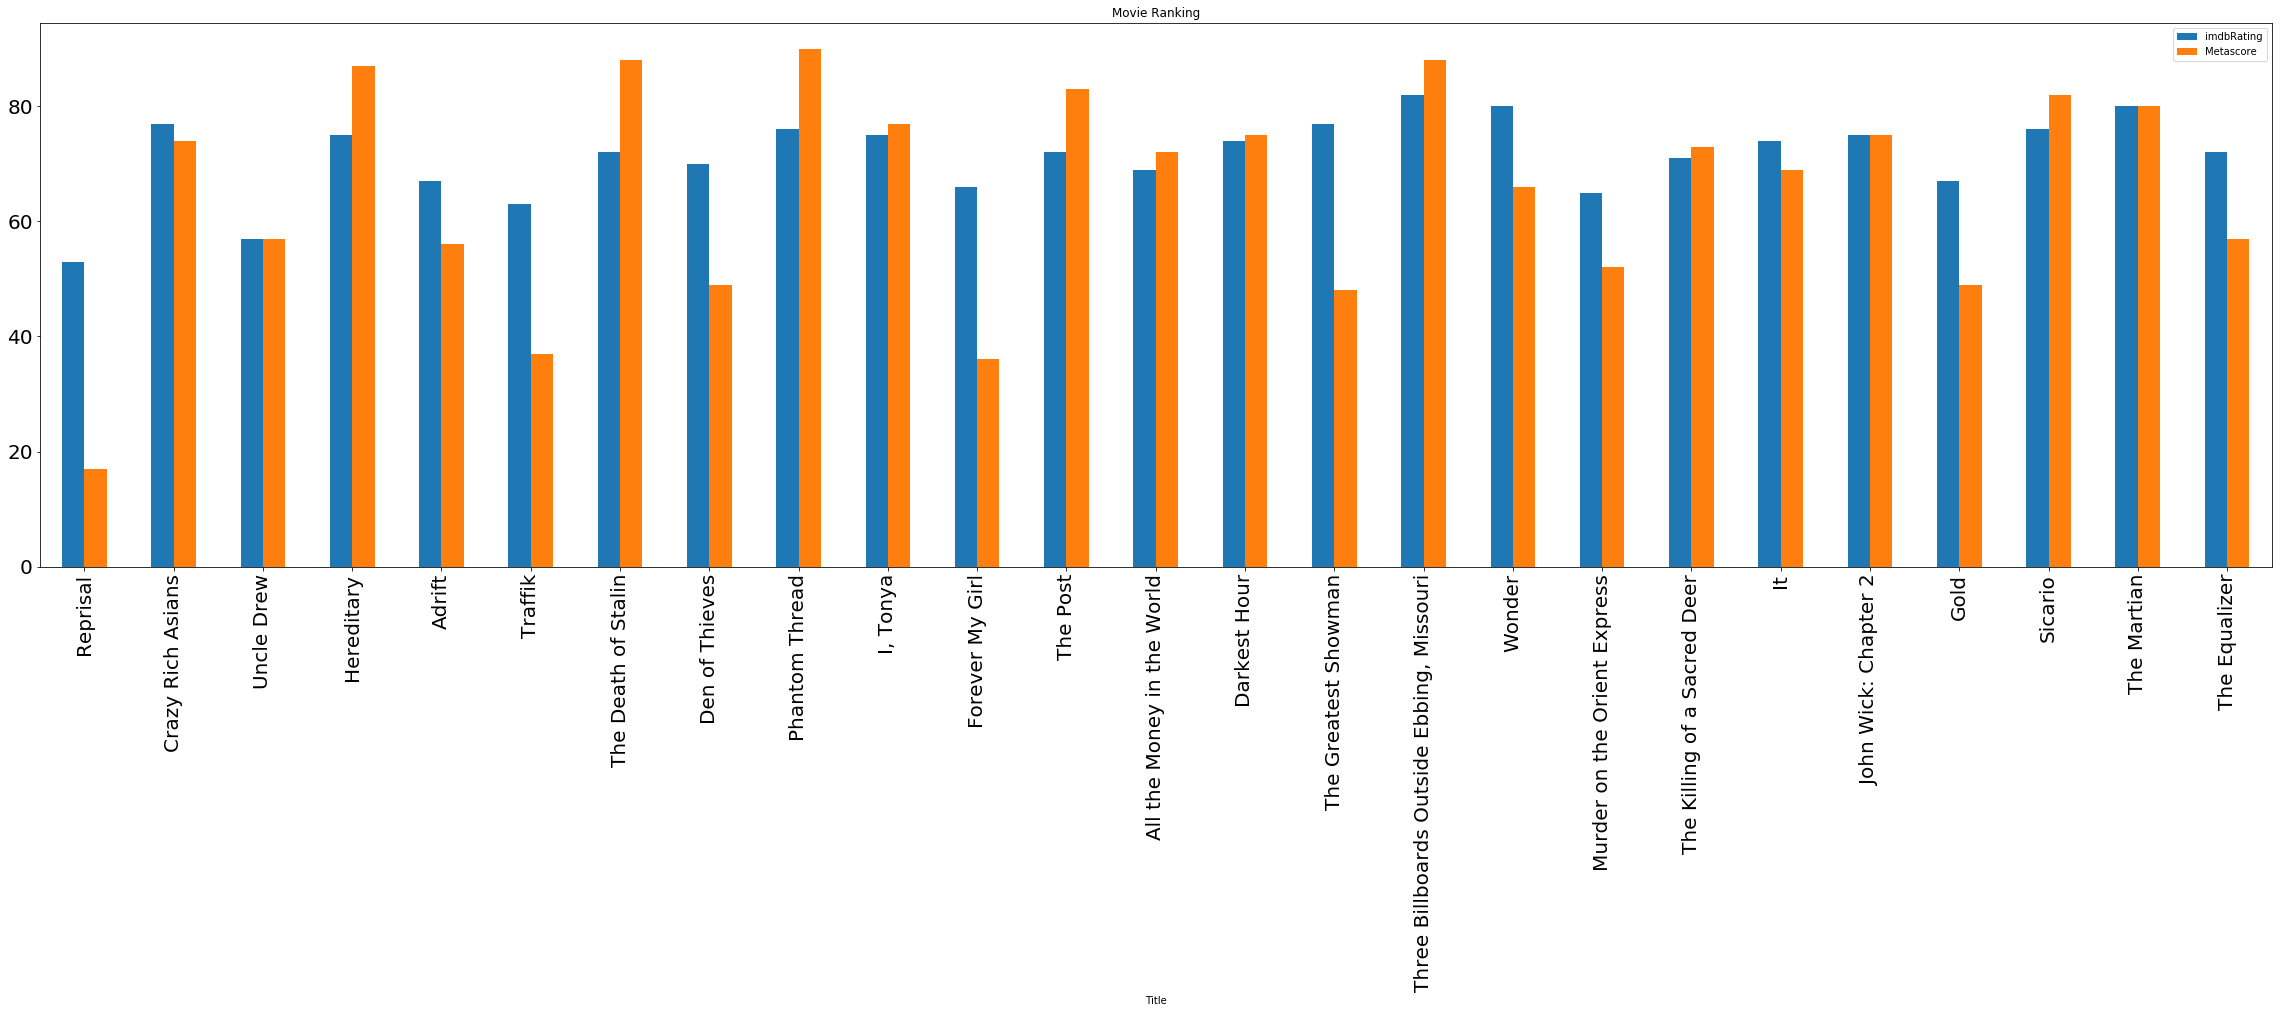

In [10]:
display(df2.plot(title='Movie Ranking',x='Title',
                 figsize=(40,10), kind='bar',fontsize=20))